In [1]:
# Import packages
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
def get_line_data(w, b, n):
    """Create known parameters"""
    weight = torch.tensor(w).reshape((-1, 1))
    bias = torch.tensor(b).reshape(-1, 1)
    X = torch.randn(n, 1)
    eps = torch.randn(n, 1)
    y = bias + X @ weight + eps
    return X, y


def get_split_data(X, y, train_frac):
    """Split the data"""
    train_idx = int(train_frac * len(X))
    X_train, X_val = X[:train_idx], X[train_idx:]
    y_train, y_val = y[:train_idx], y[train_idx:]
    return X_train, X_val, y_train, y_val


def plot_line_data(X, y):
    """Plot given X, y"""
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Data and Predictions')
    plt.show()
    

def plot_loss(epoch_count, train_loss_vals, val_loss_vals):
    """Plot loss curves"""
    plt.plot(epoch_count, train_loss_vals, label="Train loss")
    plt.plot(epoch_count, val_loss_vals, label="Test loss")
    plt.title("Training and test loss curves")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()

    
class LinearRegression(nn.Module):
    """
    Class replicates linear regression
    with a single feature using autograd
    """
    def __init__(self):
        """Initialization"""
        super().__init__()
        self.weight_hat = nn.Parameter(torch.randn(1).reshape(-1, 1))
        self.bias_hat = nn.Parameter(torch.randn(1).reshape(-1, 1))
    
    def forward(self, X):
        """Linear regression forward pass"""
        y_hat = X @ self.weight_hat + self.bias_hat
        return y_hat

In [3]:
n = 100
w = 0.7
b = 0.1
lr = 0.002
train_frac = 0.8
epochs = 100000

In [4]:
torch.manual_seed(2)
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [5]:
X, y = get_line_data(w, b, n)
X_train, X_val, y_train, y_val = get_split_data(X, y, train_frac)

In [6]:
model = LinearRegression()
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)

In [7]:
epoch_count = []
train_loss_vals = []
val_loss_vals = []

In [10]:
for epoch in range(epochs):
    """Training and evaluation loop"""
    
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model.eval()
    
    with torch.inference_mode():
        y_val_pred = model(X_val)
        loss_val = loss_fn(y_val_pred, y_val)
        
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_vals.append(loss.detach().numpy())
            val_loss_vals.append(loss_val.detach().numpy())
            print(model.state_dict())
            print(loss)

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0

tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1241]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5388]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedDict([('weight_hat', tensor([[0.5387]])), ('bias_hat', tensor([[0.1240]]))])
tensor(0.7372, grad_fn=<MeanBackward0>)
OrderedD

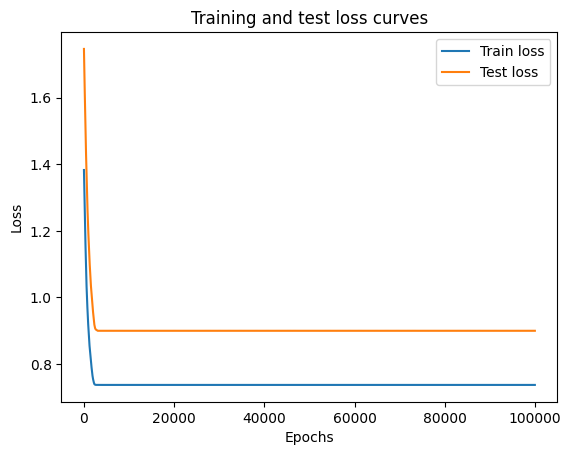

In [9]:
plot_loss(epoch_count, train_loss_vals, val_loss_vals)